<a href="https://colab.research.google.com/github/SwarupD21/Machine-Learning-Basics/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import os

**Data Collection**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gold-price-data


In [3]:
folder_path = "/kaggle/input/gold-price-data"
for file in os.listdir(folder_path):
    print(file)

gld_price_data.csv


In [4]:
file_path = "/kaggle/input/gold-price-data/gld_price_data.csv"

In [5]:
df= pd.read_csv(file_path)

**Data processing**

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.shape

(2290, 6)

In [8]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**

<Axes: >

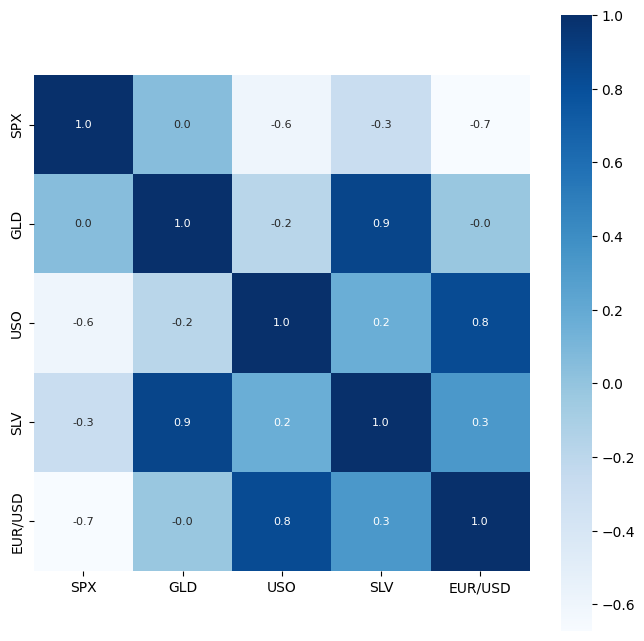

In [12]:
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8}
,cmap='Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-a6befb54552d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

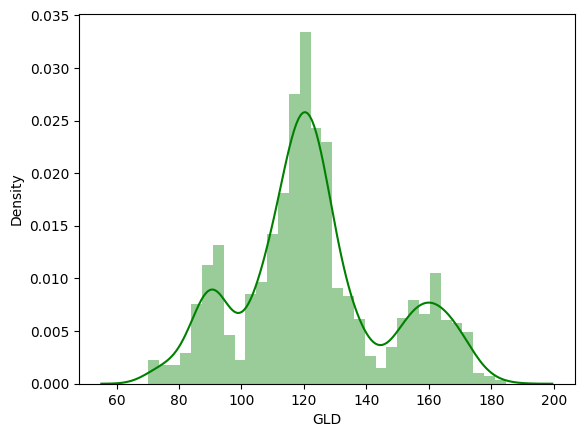

In [18]:
sns.distplot(df['GLD'],color='green')

**Splitting the features and target**

In [20]:
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

**Model Trainning**

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
test_data_prediction=regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.19059905  82.10019977 116.03160035 127.44360056 120.7404012
 154.79419722 149.9759987  126.21270028 117.52259868 126.06910074
 116.68550115 171.84310087 141.30579854 167.66039884 115.18890015
 117.7749004  139.08470278 170.26430086 159.95270243 161.64149834
 155.08450023 125.12690042 175.62629941 157.05720295 125.15840032
  93.86179999  77.27100019 120.50350026 119.11269931 167.54890072
  88.0688006  125.10980019  91.08780079 117.72770008 121.17269917
 135.92260029 115.48490151 115.01010072 146.64309934 107.17700113
 104.35140255  87.1289978  126.39650069 117.87979979 154.42229873
 119.6852001  108.3362     108.20129817  93.28920082 127.18689754
  75.46279987 113.63549947 121.19839983 111.2294991  118.9536991
 120.66849962 158.9358993  165.97210101 146.90939693  85.96919884
  94.31270029  86.77989875  90.57340016 119.08580064 126.41060049
 127.4511001  170.08070001 122.18039911 117.58549881  98.43660014
 167.89190143 142.7187992  131.79580186 121.30450235 121.39519949
 119.6570006

R sqare Error

In [29]:
error=metrics.r2_score(Y_test,test_data_prediction)

In [30]:
print("R squared error: ",error)

R squared error:  0.9896176577537931


In [34]:
Y_test=list(Y_test)

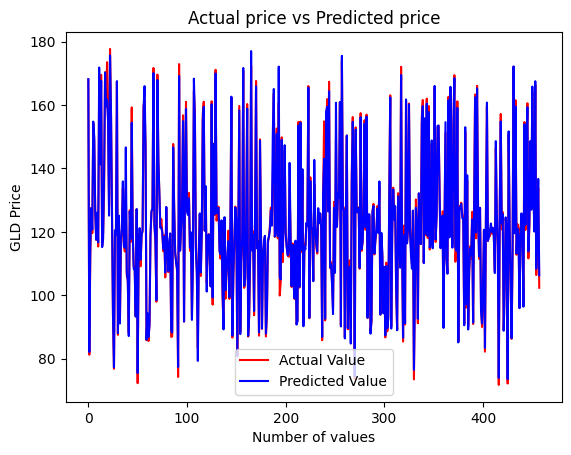

In [37]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='blue',label='Predicted Value')
plt.title("Actual price vs Predicted price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()